### 라이브러리 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [20]:
# 경고메세지 지우기
import warnings
warnings.simplefilter("ignore")

### 합계 출산율 데이터 로드

In [2]:
df1 = pd.read_excel("../../data/dataset/stat_142801.xls")
df1

,통계표명:,합계 출산율,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,단위:,"천명, 가임여자 1명당 명",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2012,2013.000,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000,2020.00
2,출생아 수,484.6,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
3,합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84
4,출처:,"통계청, 『2020년 출생통계(확정), 국가승인통계 제10103호 출생통계』",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,주석:,"* 합계 출산율 (TFR, Total Fertility Rate) : 여성 1명이 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 불필요한 정보 제거
df1 = pd.read_excel("../../data/dataset/stat_142801.xls",skiprows=2, nrows=2)
df1

,Unnamed: 0,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
1,합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [4]:
# 인덱스 지정
df1 = pd.read_excel("../../data/dataset/stat_142801.xls",skiprows=2, nrows=2, index_col=0)
df1

,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [5]:
df1.index

Index(['출생아 수', '합계 출산율'], dtype='object')

In [6]:
# 
df1.index.values

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [7]:
# 실제 값과 다르므로 에러
df1.loc['출생아 수']

KeyError: '출생아 수'

In [8]:
# 에러처리
df1.rename(index={'출생아\xa0수':'출생아 수', '합계\xa0출산율':'합계 출산율'},inplace=True )

In [10]:
df1.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [11]:
df1.loc['출생아 수']

2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

In [12]:
df1

,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


### 행/열 변경
- df.T
- df.trans

In [15]:
# 행렬바꾸기
df1 = df1.T
df1

,출생아 수,합계 출산율
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.840


### 시각화

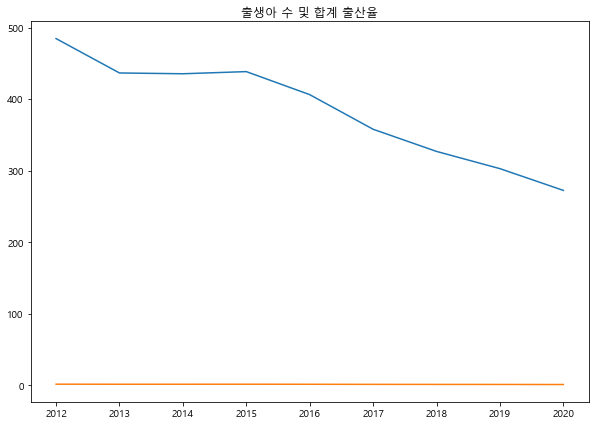

In [21]:
plt.figure(figsize=(10,7))
plt.plot(df1.index, df1['출생아 수'])
plt.plot(df1.index, df1['합계 출산율'])
plt.title('출생아 수 및 합계 출산율')
plt.show()

#### 오른쪽 축 설정
- excel에서의 z축

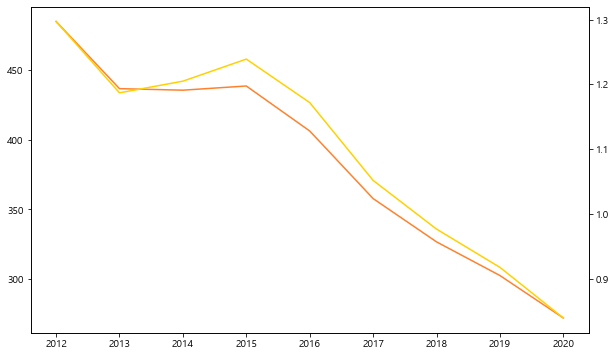

In [23]:
fig, axes = plt.subplots(figsize=(10,6))
axes.plot(df1.index, df1['출생아 수'], color = '#ff812d')

# x 축 공유
axes2 = axes.twinx()
axes2.plot(df1.index, df1['합계 출산율'], color='#ffd100')
plt.show()

#### 출생아 수 - 막대,
#### 합계 출산율 - 라인

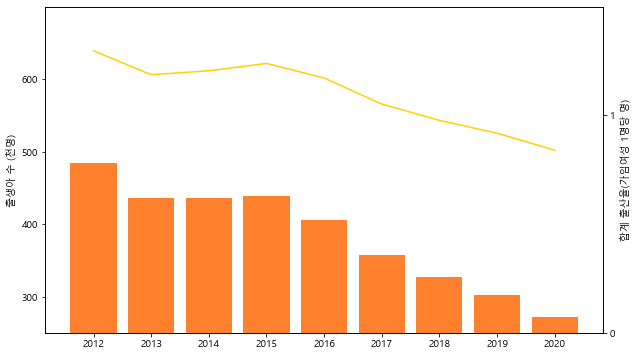

In [35]:
fig, axes = plt.subplots(figsize=(10,6))
axes.bar(df1.index, df1['출생아 수'], color = '#ff812d')
# y축 범위 설정
axes.set_ylim(250,700)
# 눈금 100 단위로 변경
axes.set_yticks([300,400,500,600])
# 라벨
axes.set_ylabel('출생아 수 (천명)')

# x 축 공유
axes2 = axes.twinx()
axes2.plot(df1.index, df1['합계 출산율'], color='#ffd100')

# z 축 설정
axes2.set_ylim(0,1.5)
axes2.set_yticks([0,1])
axes2.set_ylabel('합계 출산율(가임여성 1명당 명)')

plt.show()

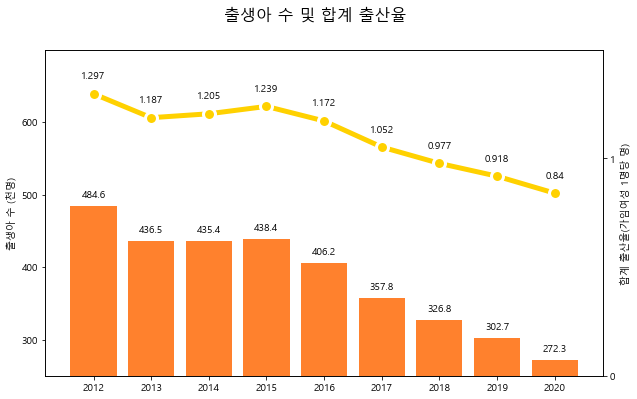

In [36]:
# 디자인 추가
fig, axes = plt.subplots(figsize=(10,6))
axes.bar(df1.index, df1['출생아 수'], color = '#ff812d')
# y축 범위 설정
axes.set_ylim(250,700)
# 눈금 100 단위로 변경
axes.set_yticks([300,400,500,600])
# 라벨
axes.set_ylabel('출생아 수 (천명)')

# 막대 위 텍스트 추가 ==for문
for idx, val in enumerate(df1['출생아 수']):
    axes.text(idx,val+12, val, ha='center')


# x 축 공유
axes2 = axes.twinx()
axes2.plot(df1.index, df1['합계 출산율'], color='#ffd100', marker='o', ms=12, lw=5, mew=3, mec='w')

# z 축 설정
axes2.set_ylim(0,1.5)
axes2.set_yticks([0,1])
axes2.set_ylabel('합계 출산율(가임여성 1명당 명)')

# 꺽은선 위 텍스트 추가 == for문
for idx, val in enumerate(df1['합계 출산율']):
    axes2.text(idx,val+0.07, val, ha='center')
    
# 차트 제목넣기

fig.suptitle('출생아 수 및 합계 출산율', fontsize= '16')

plt.show()